In [488]:
import numpy as np
import seaborn as sns
import pandas as pd

### PMF (Probability Mass Function):

In [489]:
pmf = lambda x, total : x / total

# PMF of a finding a desired ball from a box that contains 11 balls, 5 of the balls are red, 3 of the balls are green, 2 of the balls are blue,1 ball is yellow

#Pls no duplicates
balls = [5, 3, 2, 1]

# P(red ball), P(green ball), P(blue ball), P(yellow ball)
balls_pmf = {
            'red ball' : pmf(x = 5, total = 11),
            'green ball' : pmf(x = 3, total = 11),
            'blue ball' : pmf(x = 2, total = 11),
            'yellow ball' : pmf(x = 1, total = 11)
}

balls_pmf_df = pd.DataFrame(data = {'Probability' : balls_pmf})
balls_pmf_df.sort_values(by = 'Probability', inplace = True)

<Axes: xlabel='None', ylabel='Probability'>

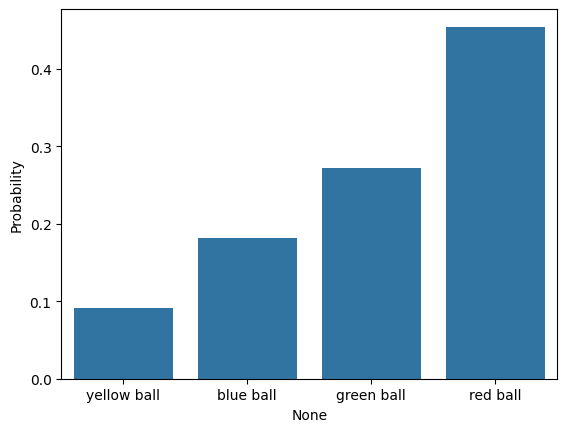

In [490]:
sns.barplot(data = balls_pmf_df, x = balls_pmf_df.index, y = "Probability")

### Bi-variate PMF

In [491]:
#Make a PMF of sum of rolling two 4 sided fair dices
dice_1 = [1, 2 ,3, 4]
dice_2 = [1, 2, 3, 4]

function_z = lambda x, y: x + y
def cartesian_product_and_map(array_1, array_2, function):
    contengency_table = []
    for i in range(len(array_1)):
        temp_row = []
        for j in range(len(array_2)):
            temp_row.append(function(x = array_1[i], y = array_2[j]))
        contengency_table.append(temp_row)
    return contengency_table

values = cartesian_product_and_map(dice_1, dice_2, function_z)

for i in values:
    print(i)


[2, 3, 4, 5]
[3, 4, 5, 6]
[4, 5, 6, 7]
[5, 6, 7, 8]


In [492]:

dice_pmf = pd.DataFrame(data = values, index = dice_1, columns = dice_2)
dice_pmf


,1,2,3,4
1,2,3,4,5
2,3,4,5,6
3,4,5,6,7
4,5,6,7,8


In [493]:
arr = dice_pmf.to_numpy().flatten()
arr2 = np.unique(arr, return_counts = True)

sum_count = pd.DataFrame(data = {'frequency' :arr2[1]}, index = arr2[0])

dice_pmf = sum_count.apply(lambda x: x / len(sum_count))
dice_pmf.rename(columns = {"frequency" : "probablity(Z = z)"}, inplace = True)
dice_pmf

,probablity(Z = z)
2,0.142857
3,0.285714
4,0.428571
5,0.571429
6,0.428571
7,0.285714
8,0.142857


Axes(0.125,0.11;0.775x0.77)


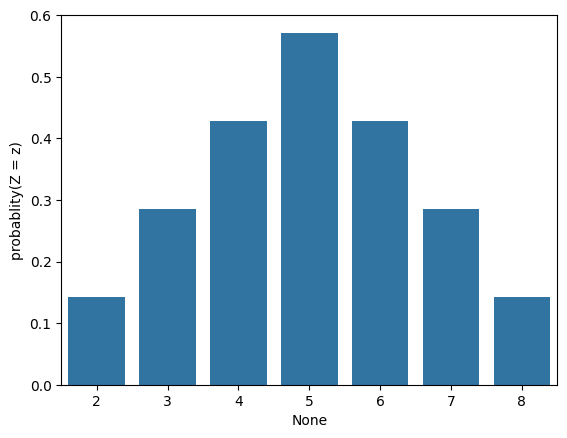

In [494]:
index = dice_pmf.index
plot = sns.barplot(data = dice_pmf, x = index, y = "probablity(Z = z)")
print(plot)

### CMF (Cumilative Mass Function):

In [495]:
def convert_to_cmf(array, i = 0):
    if i == len(array):
        return array
    elif i != 0:
        array[i] += array[i - 1]
    return convert_to_cmf(array, i + 1)

balls_pmf_array = balls_pmf_df.to_numpy()
cmf_data = convert_to_cmf(balls_pmf_array)


In [496]:

def make_cmf_index(array, index_list):
    temp_list = []
    for i in range(len(array)):
        # Make a custom
        temp_list.append(f'x =< {index_list[i]}') 
    return temp_list

balls_names = list(balls_pmf.keys())

suffix_list_1 = make_cmf_index(cmf_data, balls_names)

print(make_cmf_index(cmf_data, balls_names))

balls_cmf_df = pd.DataFrame(data = cmf_data, index = suffix_list_1)
balls_cmf_df.rename(columns = {0 : "Cumilative Probability"}, inplace = True)

balls_cmf_df

['x =< red ball', 'x =< green ball', 'x =< blue ball', 'x =< yellow ball']


,Cumilative Probability
x =< red ball,0.090909
x =< green ball,0.272727
x =< blue ball,0.545455
x =< yellow ball,1.000000


<Axes: xlabel='None', ylabel='Cumilative Probability'>

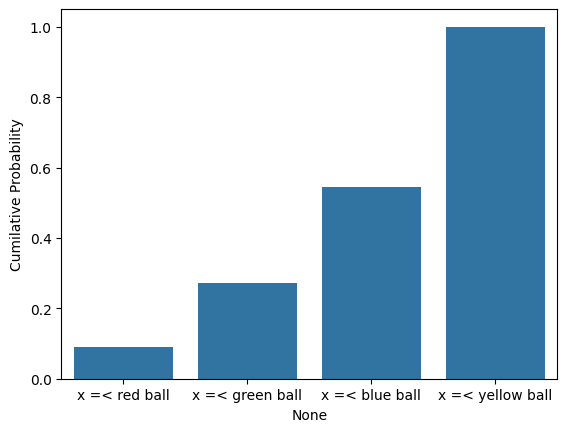

In [497]:
sns.barplot(data = balls_cmf_df, x = balls_cmf_df.index, y = "Cumilative Probability")

### CDF (Cumilative Density Function)

<Axes: xlabel='None', ylabel='Cumilative Probability'>

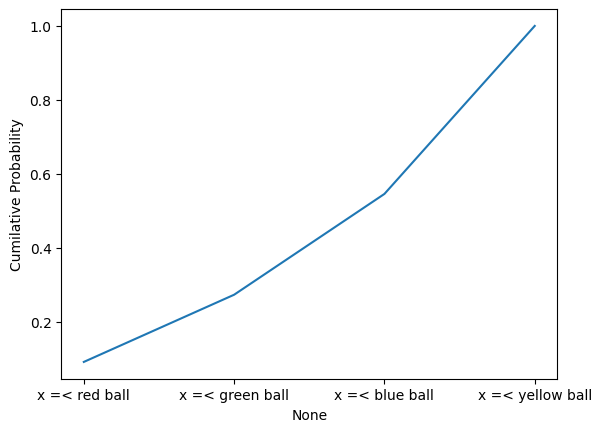

In [498]:
sns.lineplot(data = balls_cmf_df, x = balls_cmf_df.index, y = "Cumilative Probability")

### PDF (Probability Density Function)